In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_pool_info = pd.read_csv("Poll_Info.csv",sep="\t")
df_pool_info.tail()

,Question,Correct Answer,Time Launched
13,14,B,"Feb 17, 2020 10:55:12"
14,15,B,"Feb 17, 2020 11:05:13"
15,16,D,"Feb 17, 2020 11:11:47"
16,17,B,"Feb 17, 2020 11:14:36"
17,18,A,"Feb 17, 2020 11:17:54"


In [3]:
df_pool_report = pd.read_csv("Poll_Report.csv",sep=";")
df_pool_report.head()

,Question ID,User Name,User Email,Submitted Date/Time,Student Answer
0,11,Student1,table@abc.se,"Feb 17, 2020 10:46:33",B
1,11,Student2,chair@abc.se,"Feb 17, 2020 10:46:19",E
2,11,Student3,spoon@abc.se,"Feb 17, 2020 10:44:49",A
3,11,Student4,plate@abc.se,"Feb 17, 2020 10:45:30",A
4,11,Student5,fork@abc.se,"Feb 17, 2020 10:44:53",E


In [4]:
merged_df = pd.merge(df_pool_info,df_pool_report,left_on="Question",right_on="Question ID")
merged_df.drop("Question ID",axis=1,inplace=True)
merged_df.tail()

,Question,Correct Answer,Time Launched,User Name,User Email,Submitted Date/Time,Student Answer
479,18,A,"Feb 17, 2020 11:17:54",Student22,soap@abc.se,"Feb 17, 2020 11:20:00",A
480,18,A,"Feb 17, 2020 11:17:54",Student24,dish_washer@abc.se,"Feb 17, 2020 11:20:44",A
481,18,A,"Feb 17, 2020 11:17:54",Student25,handsoap@abc.se,"Feb 17, 2020 11:23:59",C
482,18,A,"Feb 17, 2020 11:17:54",Student26,sink@abc.se,"Feb 17, 2020 11:18:37",A
483,18,A,"Feb 17, 2020 11:17:54",Student27,tap@abc.se,"Feb 17, 2020 11:24:44",B


In [5]:
merged_df["date_time_launched"]=pd.to_datetime(merged_df["Time Launched"]).dt.time
merged_df["date_submitted_time"]=pd.to_datetime(merged_df["Submitted Date/Time"]).dt.time
merged_df.drop(["Time Launched","Submitted Date/Time"],axis=1,inplace=True)

In [6]:
merged_df.head()

,Question,Correct Answer,User Name,User Email,Student Answer,date_time_launched,date_submitted_time
0,1,C,Student1,table@abc.se,C,10:14:55,10:15:27
1,1,C,Student2,chair@abc.se,C,10:14:55,10:15:21
2,1,C,Student3,spoon@abc.se,C,10:14:55,10:15:26
3,1,C,Student4,plate@abc.se,C,10:14:55,10:15:24
4,1,C,Student5,fork@abc.se,C,10:14:55,10:15:25


In [7]:
merged_df['seconds_for_answering']= (pd.to_timedelta(merged_df['date_submitted_time'].astype(str)) - 
                             pd.to_timedelta(merged_df['date_time_launched'].astype(str))).dt.total_seconds()

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 483
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Question               484 non-null    int64  
 1   Correct Answer         484 non-null    object 
 2   User Name              484 non-null    object 
 3   User Email             484 non-null    object 
 4   Student Answer         484 non-null    object 
 5   date_time_launched     484 non-null    object 
 6   date_submitted_time    484 non-null    object 
 7   seconds_for_answering  484 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 34.0+ KB


In [9]:
merged_df.head()

,Question,Correct Answer,User Name,User Email,Student Answer,date_time_launched,date_submitted_time,seconds_for_answering
0,1,C,Student1,table@abc.se,C,10:14:55,10:15:27,32.0
1,1,C,Student2,chair@abc.se,C,10:14:55,10:15:21,26.0
2,1,C,Student3,spoon@abc.se,C,10:14:55,10:15:26,31.0
3,1,C,Student4,plate@abc.se,C,10:14:55,10:15:24,29.0
4,1,C,Student5,fork@abc.se,C,10:14:55,10:15:25,30.0


In [10]:
merged_df.drop(["date_time_launched","date_submitted_time"],axis=1,inplace=True)
merged_df.head()

,Question,Correct Answer,User Name,User Email,Student Answer,seconds_for_answering
0,1,C,Student1,table@abc.se,C,32.0
1,1,C,Student2,chair@abc.se,C,26.0
2,1,C,Student3,spoon@abc.se,C,31.0
3,1,C,Student4,plate@abc.se,C,29.0
4,1,C,Student5,fork@abc.se,C,30.0


In [11]:
merged_df.rename(columns={'User Name':'Student_Number'}, inplace=True)
merged_df.head()

,Question,Correct Answer,Student_Number,User Email,Student Answer,seconds_for_answering
0,1,C,Student1,table@abc.se,C,32.0
1,1,C,Student2,chair@abc.se,C,26.0
2,1,C,Student3,spoon@abc.se,C,31.0
3,1,C,Student4,plate@abc.se,C,29.0
4,1,C,Student5,fork@abc.se,C,30.0


In [12]:
merged_df["answer_is_true"] = np.where(merged_df["Correct Answer"]==merged_df["Student Answer"],1,0)
merged_df["answer_is_true"] = merged_df["answer_is_true"].astype("object")
merged_df.head(7)

,Question,Correct Answer,Student_Number,User Email,Student Answer,seconds_for_answering,answer_is_true
0,1,C,Student1,table@abc.se,C,32.0,1
1,1,C,Student2,chair@abc.se,C,26.0,1
2,1,C,Student3,spoon@abc.se,C,31.0,1
3,1,C,Student4,plate@abc.se,C,29.0,1
4,1,C,Student5,fork@abc.se,C,30.0,1
5,1,C,Student6,knife@abc.se,B,33.0,0
6,1,C,Student7,saucer@abc.se,C,26.0,1


In [13]:
grouped_df = merged_df.groupby(["Student_Number","User Email"]).agg({"answer_is_true":"sum"}).sort_values(by='answer_is_true', ascending=False)

In [14]:
grouped_df.head()

,,answer_is_true
Student_Number,User Email,
Student16,jug@abc.se,18
Student13,candle_holder@abc.se,17
Student20,lid@abc.se,16
Student21,brush@abc.se,15
Student7,saucer@abc.se,15


In [15]:
merged_df[merged_df["Student_Number"] == "Student16"]

,Question,Correct Answer,Student_Number,User Email,Student Answer,seconds_for_answering,answer_is_true
15,1,C,Student16,jug@abc.se,C,33.0,1
42,2,B,Student16,jug@abc.se,B,31.0,1
69,3,E,Student16,jug@abc.se,E,17.0,1
96,4,C,Student16,jug@abc.se,C,21.0,1
123,5,B,Student16,jug@abc.se,B,30.0,1
150,6,E,Student16,jug@abc.se,E,31.0,1
177,7,C,Student16,jug@abc.se,C,55.0,1
204,8,D,Student16,jug@abc.se,D,59.0,1
231,9,A,Student16,jug@abc.se,A,35.0,1
258,10,D,Student16,jug@abc.se,D,38.0,1


In [16]:
grouped_df.tail()

,,answer_is_true
Student_Number,User Email,
Student8,glass@abc.se,10
Student1,table@abc.se,9
Student5,fork@abc.se,8
Student27,tap@abc.se,7
Student23,dishes@abc.se,6


In [17]:
merged_df[merged_df["Student_Number"] == "Student23"]

,Question,Correct Answer,Student_Number,User Email,Student Answer,seconds_for_answering,answer_is_true
22,1,C,Student23,dishes@abc.se,C,26.0,1
49,2,B,Student23,dishes@abc.se,B,20.0,1
76,3,E,Student23,dishes@abc.se,D,115.0,0
103,4,C,Student23,dishes@abc.se,B,96.0,0
130,5,B,Student23,dishes@abc.se,B,31.0,1
157,6,E,Student23,dishes@abc.se,D,36.0,0
184,7,C,Student23,dishes@abc.se,C,34.0,1
211,8,D,Student23,dishes@abc.se,E,129.0,0
238,9,A,Student23,dishes@abc.se,A,152.0,1
265,10,D,Student23,dishes@abc.se,A,111.0,0


### 1) Analyse how many questions are correctly answered by each student. Show the result with appropriate visualisation

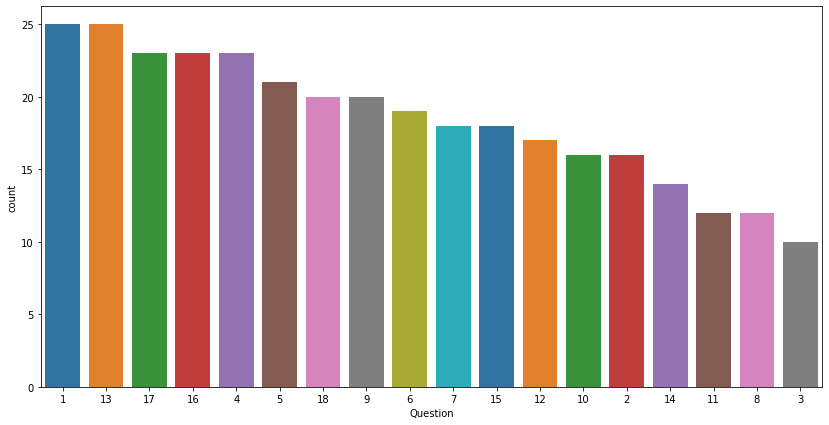

In [18]:
data_students = merged_df[merged_df["answer_is_true"]==1]
plt.figure(figsize=(14,7))
sns.countplot(data=data_students,x="Question",palette="tab10",order=data_students['Question'].value_counts().index);
plt.show();

### 2) Analyse how many students answered correctly for each question. Show the result with appropriate visualisation.

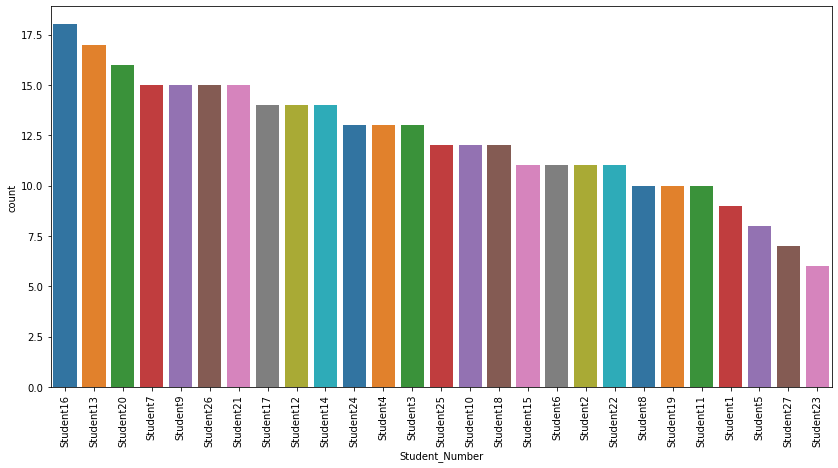

In [19]:
data_students = merged_df[merged_df["answer_is_true"]==1]
plt.figure(figsize=(14,7))
sns.countplot(data=data_students,x="Student_Number",palette="tab10",order=data_students['Student_Number'].value_counts().index);
plt.xticks(rotation=90)
plt.show();

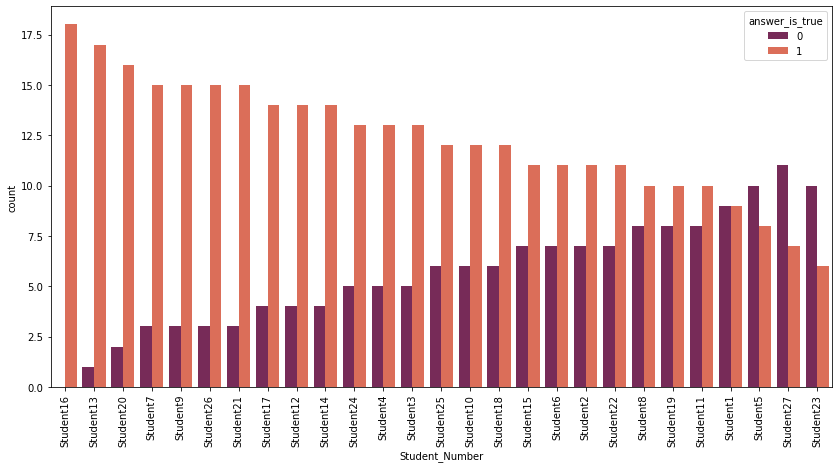

In [20]:
plt.figure(figsize=(14,7))
sns.countplot(data=merged_df,x="Student_Number",hue="answer_is_true",palette="rocket",
              order=data_students['Student_Number'].value_counts().index);
plt.xticks(rotation=90)
plt.show();

### 3.a ) For each student, which question(s) took the longest time for that student?

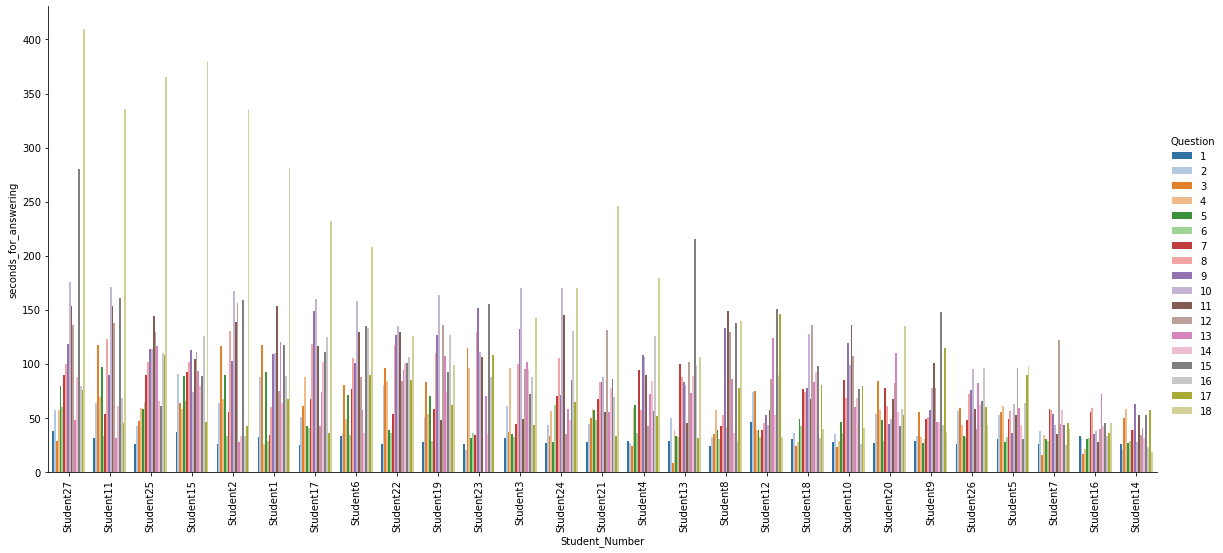

In [21]:
plot_order = merged_df.groupby('Student_Number')['seconds_for_answering'].mean().sort_values(ascending=False).index.values
sns.catplot(data=merged_df, x='Student_Number',  y='seconds_for_answering',kind='bar',hue="Question",ci=None,
            order=plot_order,height=7,aspect=2.3,palette="tab20");
plt.xticks(rotation=90)
plt.show()

### 3.b) Which question(s) took the longest time to answer among all student (that is, no student took longer to give a correct answer to this question or to any other question)?

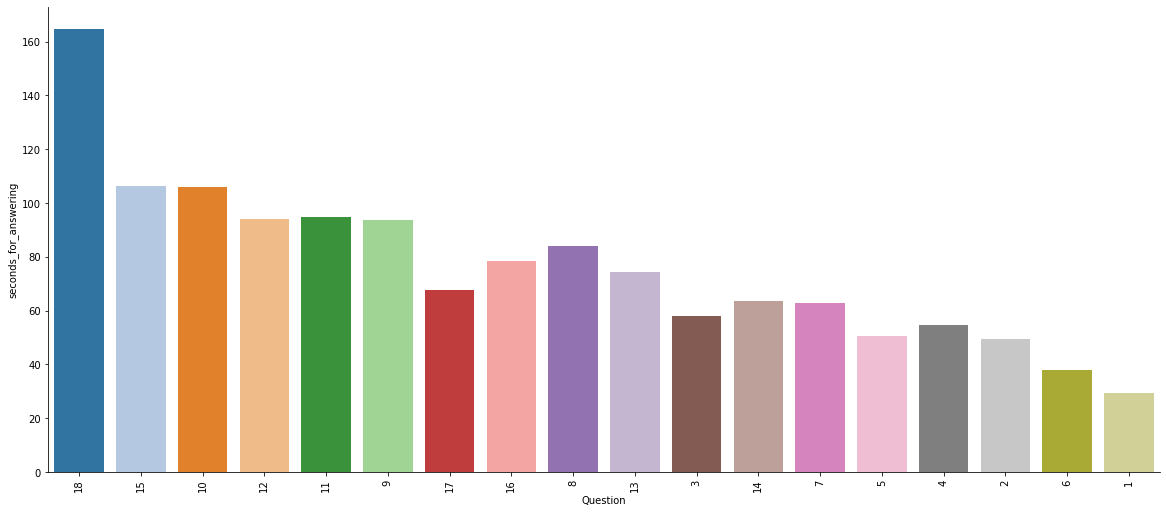

In [22]:
plot_order = merged_df.groupby('Question')['seconds_for_answering'].max().sort_values(ascending=False).index.values
sns.catplot(data=merged_df, x='Question',  y='seconds_for_answering',kind='bar',ci=None,
            order=plot_order,height=7,aspect=2.3,palette="tab20");
plt.xticks(rotation=90)
plt.show()

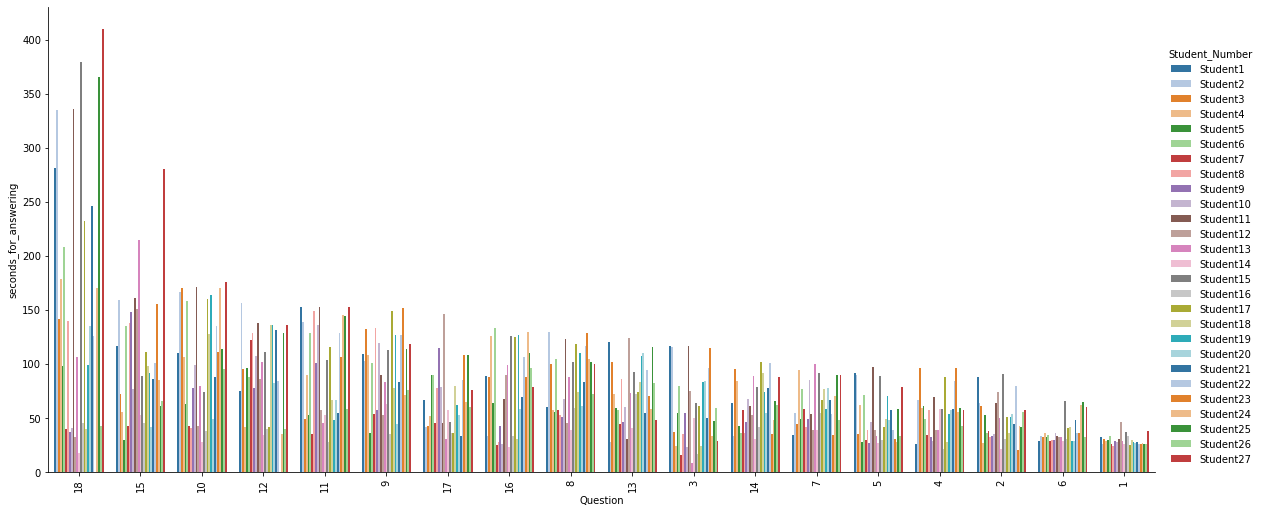

In [23]:
plot_order = merged_df.groupby('Question')['seconds_for_answering'].max().sort_values(ascending=False).index.values
sns.catplot(data=merged_df, x='Question',  y='seconds_for_answering',kind='bar',hue="Student_Number",ci=None,
            order=plot_order,height=7,aspect=2.3,palette="tab20");
plt.xticks(rotation=90)
plt.show()

### 3.c) Which question(s) had the longest average response time?

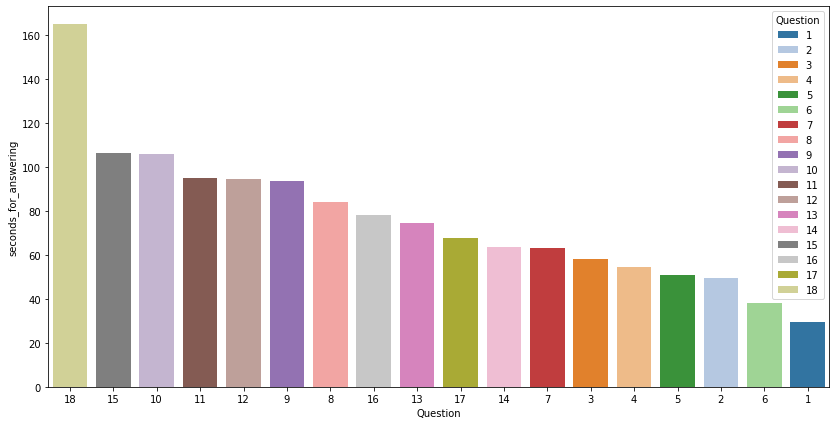

In [24]:
plot_order = merged_df.groupby('Question')['seconds_for_answering'].mean().sort_values(ascending=False).index.values
plt.figure(figsize=(14,7));
sns.barplot(data=merged_df, x='Question',  y='seconds_for_answering',hue="Question",ci=None,
            order=plot_order,dodge=False,palette="tab20");
plt.show();

### 4) Investigate whether students who took a longer time to answer perform well or not.

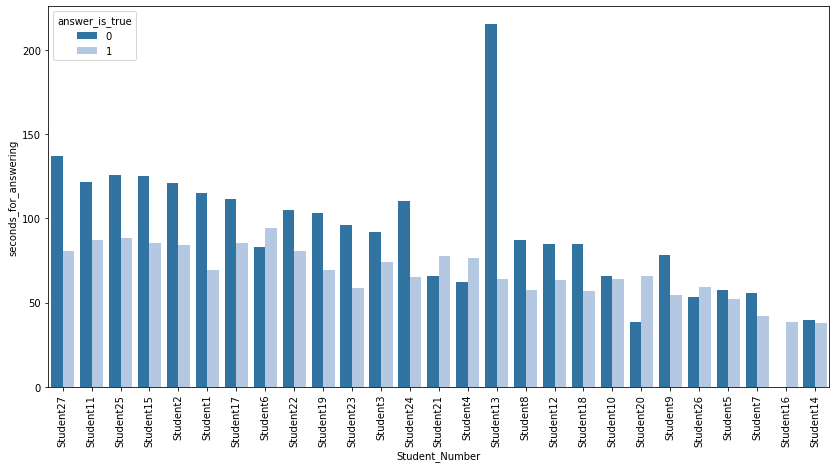

In [25]:
plot_order = merged_df.groupby('Student_Number')['seconds_for_answering'].mean().sort_values(ascending=False).index.values
plt.figure(figsize=(14,7));
sns.barplot(data=merged_df, x='Student_Number',  y='seconds_for_answering',hue="answer_is_true",ci=None,
            order=plot_order,dodge=True,palette="tab20");
plt.xticks(rotation=90)
plt.show();

### 5) Find all pairs of students who gave the same wrong answers for at least two questions. 113

In [26]:
data_students_wrong = merged_df[merged_df["answer_is_true"]==0]
data_students_wrong.head()

,Question,Correct Answer,Student_Number,User Email,Student Answer,seconds_for_answering,answer_is_true
5,1,C,Student6,knife@abc.se,B,33.0,0
26,1,C,Student27,tap@abc.se,B,38.0,0
27,2,B,Student1,table@abc.se,D,88.0,0
30,2,B,Student4,plate@abc.se,A,27.0,0
31,2,B,Student5,fork@abc.se,D,53.0,0


In [27]:
data_students_wrong[(data_students_wrong["Correct Answer"]=="B") & (data_students_wrong["Student Answer"]=="A") &
                    (data_students_wrong["Question"]==2)]

,Question,Correct Answer,Student_Number,User Email,Student Answer,seconds_for_answering,answer_is_true
30,2,B,Student4,plate@abc.se,A,27.0,0
36,2,B,Student10,cutlery@abc.se,A,35.0,0
45,2,B,Student19,pan@abc.se,A,51.0,0
48,2,B,Student22,soap@abc.se,A,80.0,0


In [28]:
data_false_pairs =data_students_wrong.groupby(["Student_Number","Question","Correct Answer",
"Student Answer"],as_index=False).agg({'Student_Number':'max'}).sort_values(by=["Question"],ascending=True)
data_false_pairs.head(20)

,Question,Correct Answer,Student Answer,Student_Number
131,1,C,B,Student6
100,1,C,B,Student27
0,2,B,D,Student1
116,2,B,A,Student4
69,2,B,A,Student22
121,2,B,D,Student5
49,2,B,A,Student19
32,2,B,D,Student15
23,2,B,C,Student12
101,2,B,D,Student27


In [29]:
data_false_pairs[(data_false_pairs["Student_Number"]=="Student22") | 
                 (data_false_pairs["Student_Number"]=="Student10")].sort_values(by=["Question"],ascending=True)

,Question,Correct Answer,Student Answer,Student_Number
69,2,B,A,Student22
9,2,B,A,Student10
70,3,E,D,Student22
71,4,C,B,Student22
10,5,B,A,Student10
72,8,D,A,Student22
11,8,D,C,Student10
73,9,A,D,Student22
12,10,D,B,Student10
74,11,A,B,Student22
